In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Datos de entrenamiento
celcius = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
faranheit = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

In [26]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # Capa de entrada
modelo = tf.keras.Sequential([capa]) # Modelo de red neuronal

In [27]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error', # Error cuadratico medio
)

In [28]:
print("Comienza entrenamiento")
historial = modelo.fit(celcius, faranheit, epochs=500, verbose=False) # Entrenamiento
print("Entrenamiento terminado")

Comienza entrenamiento
Entrenamiento terminado


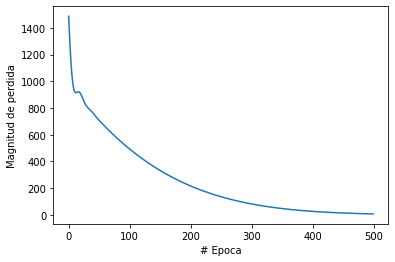

In [29]:
import matplotlib.pyplot as plt
plt.xlabel('# Epoca') # Etiqueta eje x
plt.ylabel('Magnitud de perdida') # Etiqueta eje y
plt.plot(historial.history['loss']) # Grafica de perdida
plt.show()

In [30]:
print("Predicciones")
resultado = modelo.predict([100.0]) # Prediccion
print("El resultado es: ", resultado)

Predicciones
El resultado es:  [[211.33702]]


In [31]:
print("Varibles internas del modelo")
print(capa.get_weights()) # (Pesos de la capa, sesgo)

Varibles internas del modelo
[array([[1.8206706]], dtype=float32), array([29.269964], dtype=float32)]


(Input * Peso) + Sego

In [32]:
# exportar el modelo a formato h5
modelo.save("celsius.h5")
print("Modelo exportado")

Modelo exportado


In [35]:
# convertir el modelo a tensorflowjs
!tensorflowjs_converter --input_format keras celsius.h5 carpeta_salida